<a href="https://colab.research.google.com/github/vaibhavi128/Data-Science/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


Load the Iris Dataset

In [ ]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the species for better understanding
iris_df['species'] = iris.target


 Calculate the Correlation Matrix

In [ ]:
correlation_matrix = iris_df.corr()

#  correlation matrix

print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


Plot the Correlation

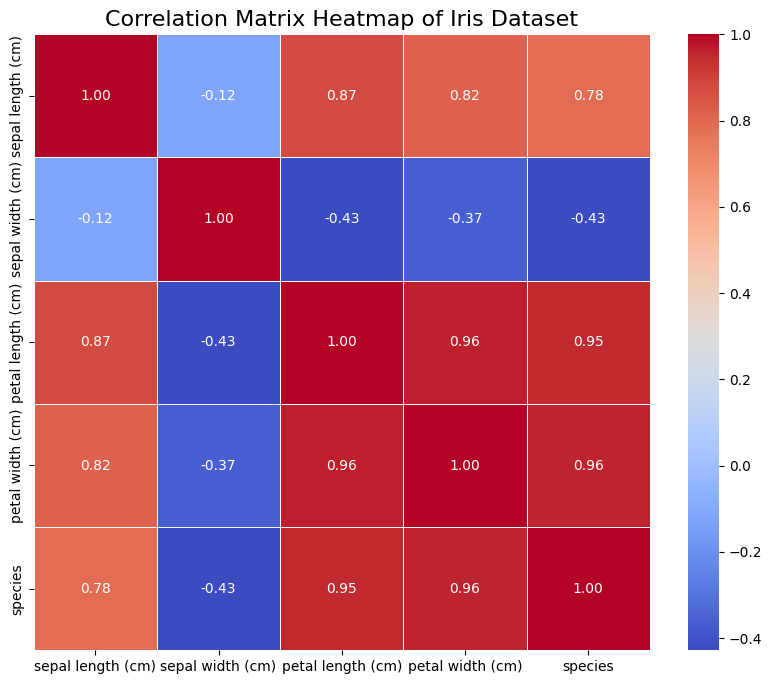

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Add a title
plt.title('Correlation Matrix Heatmap of Iris Dataset', fontsize=16)

# Display the plot
plt.show()

BoxPlot

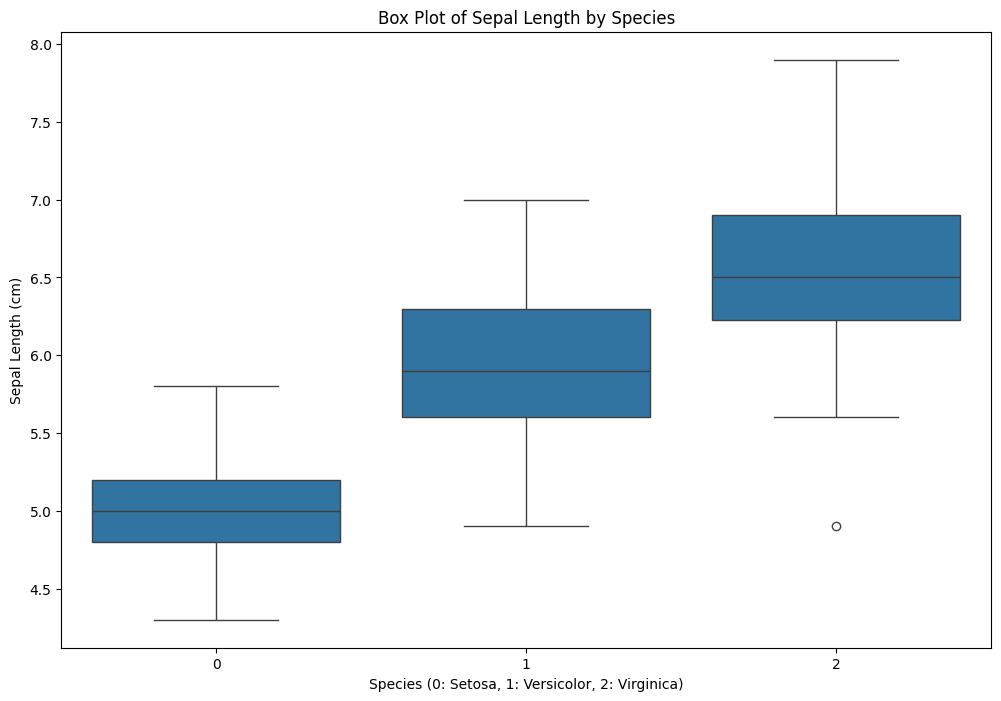

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.ylabel('Sepal Length (cm)')
plt.show()

Scatter Plot

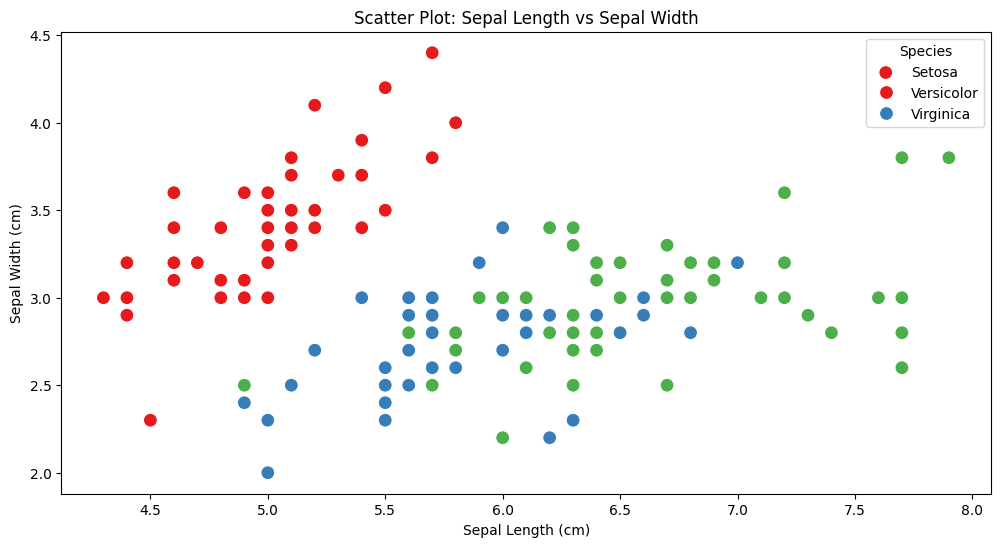

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1', s=100)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

Histogram

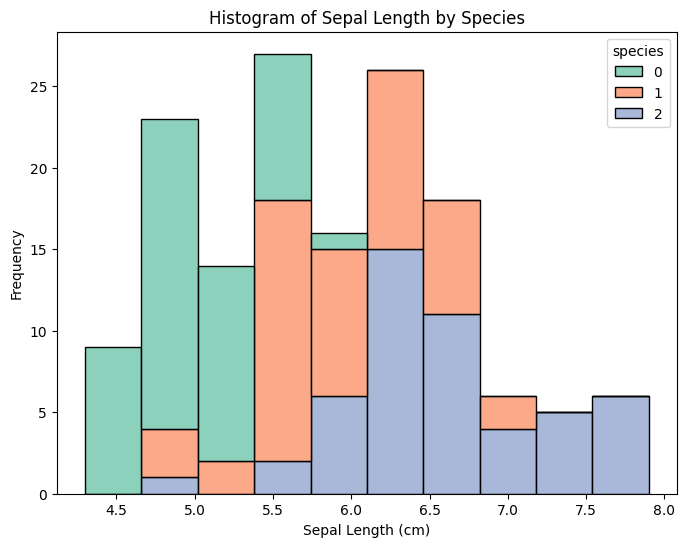

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', multiple='stack', bins=10, palette='Set2')
plt.title('Histogram of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

Pairplot

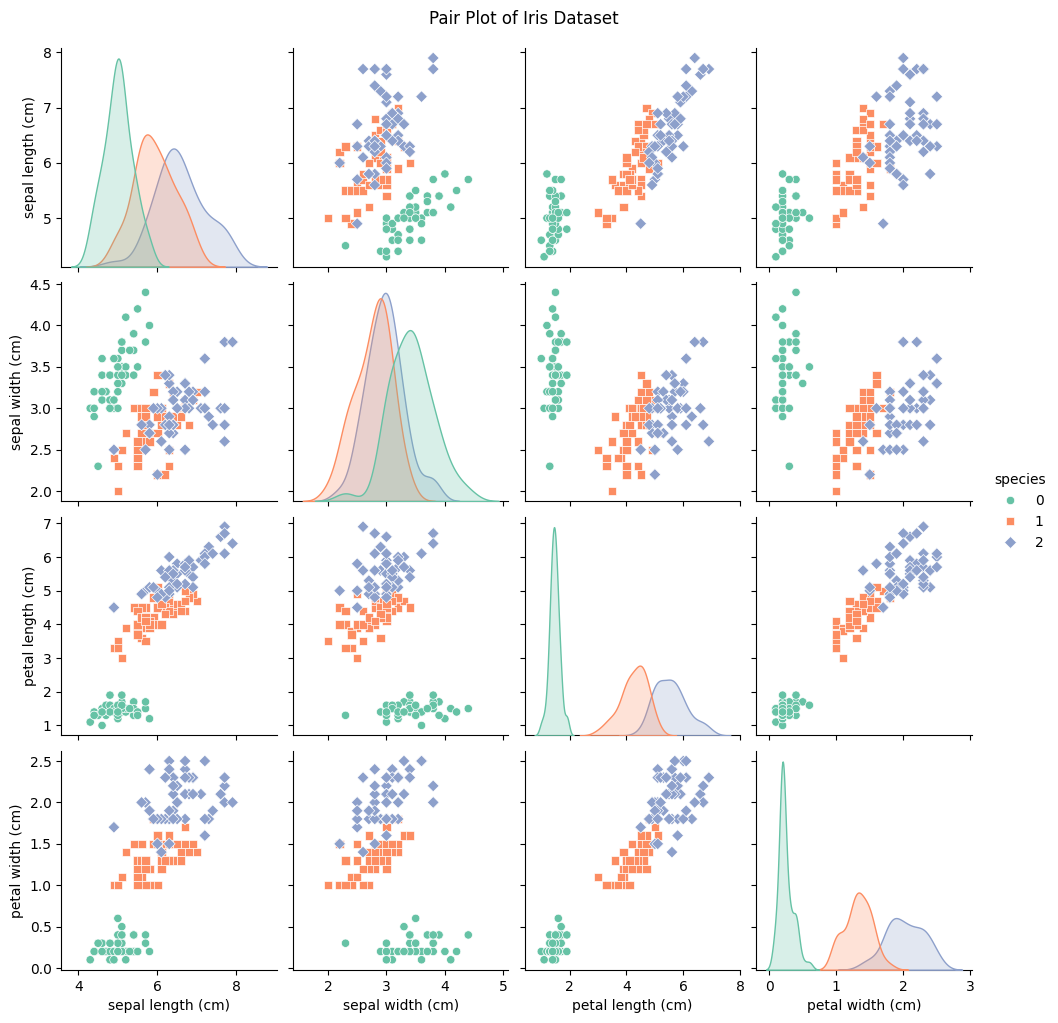

In [ ]:
sns.pairplot(iris_df, hue='species', palette='Set2', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

ViolinPlot

C:\Users\omkar\AppData\Local\Temp\ipykernel_15748\3480823275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='Set2')
C:\Users\omkar\AppData\Local\Temp\ipykernel_15748\3480823275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='Set2')
C:\Users\omkar\AppData\Local\Temp\ipykernel_15748\3480823275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='Set2')
C:\Users\omkar\AppData\Local\Temp\ipy

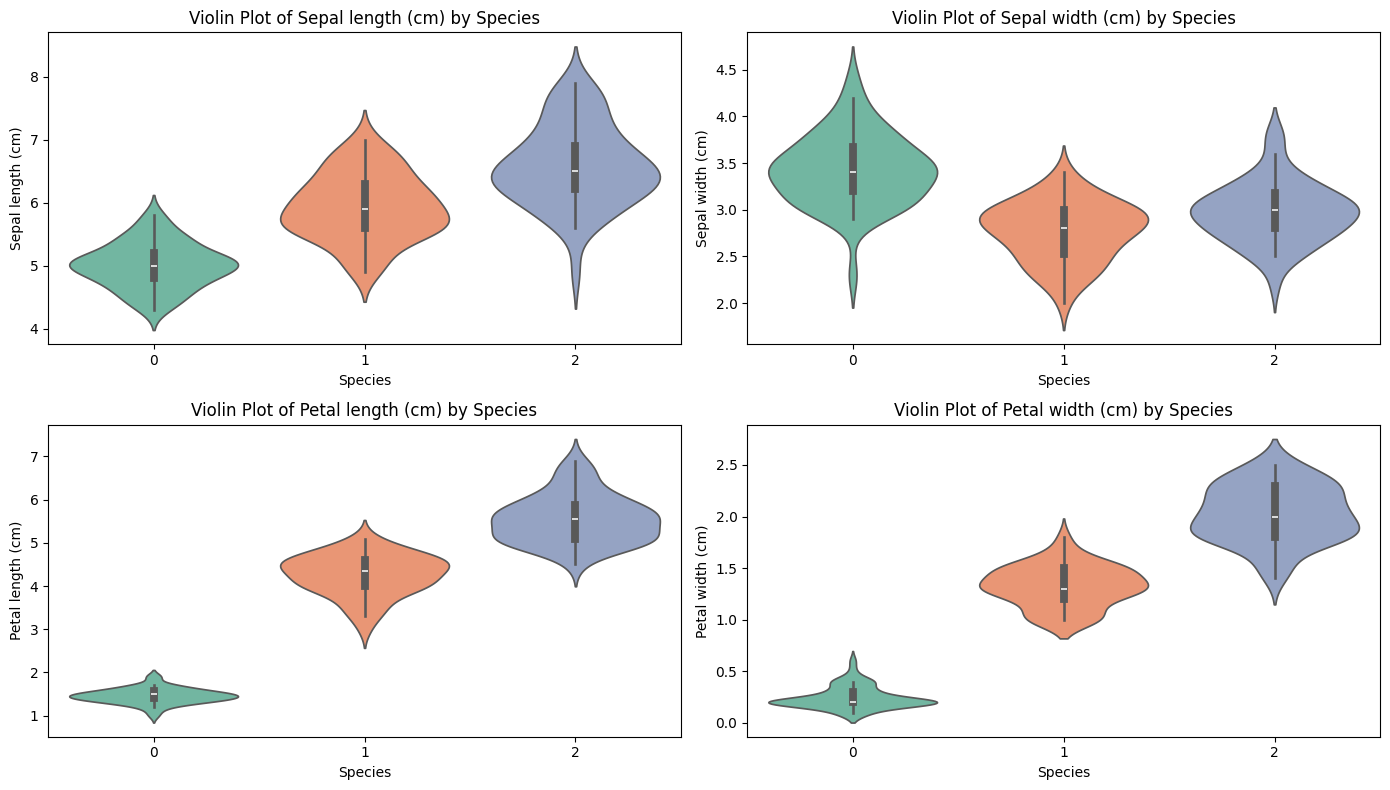

In [ ]:
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, idx + 1)
    sns.violinplot(x='species', y=feature, data=iris_df, palette='Set2')
    plt.title(f'Violin Plot of {feature.capitalize()} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

Model Accuracy: 100.00%


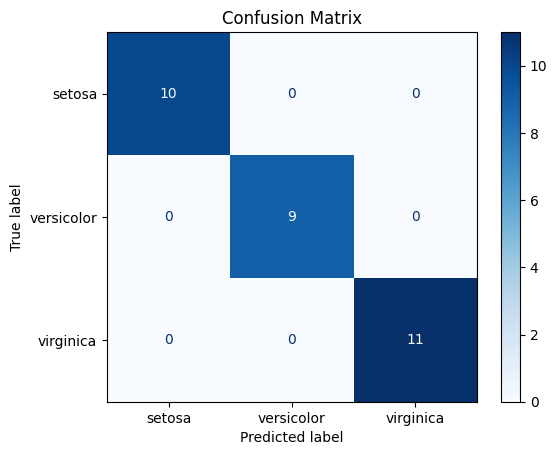

In [ ]:
scaler = StandardScaler()
features = iris_df.drop('species', axis=1)  # Features without target
features_scaled = scaler.fit_transform(features)  # Scaling the features
features_scaled_df = pd.DataFrame(features_scaled, columns=iris.feature_names)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, iris_df['species'], test_size=0.2, random_state=42)

# 3. Model Training: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)  # Training the model

# 4. Model Evaluation
y_pred = model.predict(X_test)  # Making predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Creating confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
cmd.plot(cmap='Blues')  # Plotting confusion matrix
plt.title('Confusion Matrix')
plt.show()